**> > In this project we have to build a system which summarizes the customer reviews of a particular product into a bunch of keywords, so that when a customer goes to a product page, he/she doesn’t have to read long reviews. Instead he/she can make up his/her mind based on the product average rating and summarized keywords of the review. 
For ******

In [41]:
import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess

from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [39]:
import seaborn as sns

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cellphone-data/Cell_Phones_and_Accessories.json


#Analysing the data & plot the required graphs to show that these conclusions are true:****

In [9]:
import requests
import pandas as pd
import numpy as np


import warnings
import base64
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import json

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from textblob import TextBlob
import scipy.stats as stats


from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from matplotlib import pyplot as plt
%matplotlib inline

Loading BokehJS ...

In [6]:
pdObj = pd.read_json('/kaggle/input/cellphone-data/Cell_Phones_and_Accessories.json')


print(pdObj)

        Rating  Rev_verify  Review_Date          IC  \
0            5        True   09 1, 2015  B009XD5TPQ   
1            5        True   01 9, 2016  B016MF3P3K   
2            5        True  04 21, 2013  B008DC8N5G   
3            3        True  02 27, 2013  B0089CH3TM   
4            4        True  12 19, 2013  B00AKZWGAC   
...        ...         ...          ...         ...   
760445       4       False  07 12, 2014  B00C3V9M8A   
760446       5       False  07 13, 2016  B0178BYS24   
760447       4        True  07 23, 2015  B009KY47CE   
760448       5        True  12 14, 2015  B00X60AYDY   
760449       5        True  02 24, 2016  B00QLD3YTO   

                           Prod_meta      Reviewer_Name  \
0                               None     Sunny  Zoeller   
1                               None      Denise Lesley   
2                               None               Emir   
3               {'Color:': ' Green'}              Alyse   
4                               None        

** IC – Item Code of the product, e.g. B016MF3P3K   Reviewer_Name - Name of the reviewer  Useful- Number of useful votes (upvotes) of the review  Prod_meta- a dictionary of the product metadata. It contains only additional information about the product, if any available.  Review- text of the review  Rating- rating given to the product by the reviewer.  Rev_summ- summary of the review  Review_timestamp- time when the review has been posted (unix time format)  Review_Date- Date when the review has been posted  Prod_img- images that users post after they have received the product  Rev_verify- Flag to represent whether the review has been verified or not. (True/False) ******

In [10]:
pdObj.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Prod_meta           object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
Useful              object
Prod_img            object
dtype: object

In [11]:
df=pdObj 

In [12]:
df=pdObj

In [13]:
df1=df

In [14]:
df1['Review']=df1['Review'].astype(str)

In [15]:
df.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Prod_meta           object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
Useful              object
Prod_img            object
dtype: object

In [16]:
df.describe()

,Rating,Review_timestamp
count,760450.000000,7.604500e+05
mean,4.221357,1.440417e+09
std,1.232186,4.563251e+07
min,1.000000,1.035331e+09
25%,4.000000,1.416355e+09
50%,5.000000,1.444349e+09
75%,5.000000,1.470442e+09
max,5.000000,1.538438e+09


****EDA****

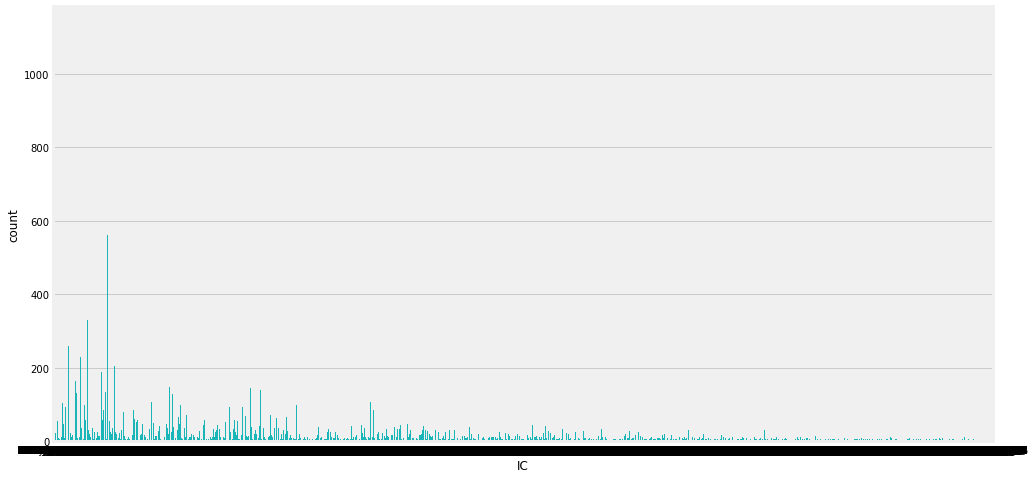

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.figure(figsize=(15,8))
sns.countplot('IC', data=df, color="darkturquoise")
plt.show()

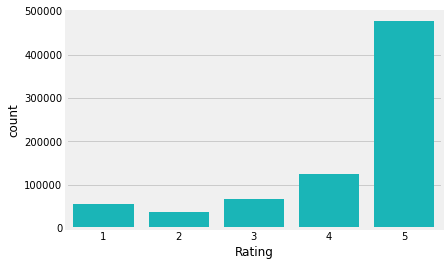

In [81]:
sns.countplot('Rating', data=df, color="darkturquoise")
plt.show()

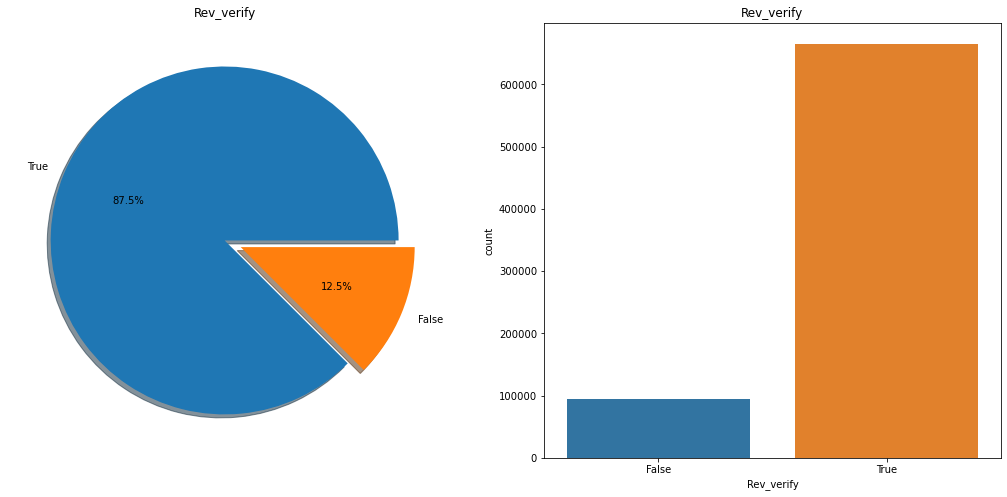

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Rev_verify'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Rev_verify')
ax[0].set_ylabel('')
sns.countplot('Rev_verify',data=df,ax=ax[1])
ax[1].set_title('Rev_verify')
plt.show()

In [17]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [18]:
df.shape

(760450, 11)

In [19]:
df1=df

In [21]:
df1.dropna(subset=['Review'],inplace = True)

In [22]:
df1.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                   0
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [24]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import string
import nltk
warnings.filterwarnings('ignore')

In [25]:
df1['lower_case']=df1['Review'].apply(lambda x: ( x.lower()))
df1['lower_case']=(df1['lower_case'])

In [26]:
df1['cleanedtest'] = df1['lower_case'].str.replace(r'[^\w\d\s]', '')


# Replace whitespace between terms with a single space
df1['cleanedtest'] = df1['cleanedtest'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df1['cleanedtest'] = df1['cleanedtest'].str.replace(r'^\s+|\s+?$!@#$%^&*_-+=:;"''"', '')

In [27]:
stop_words = set(stopwords.words('english') )

df1['cleanedtest'] = df1['cleanedtest'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [30]:
reindexed_data=df['Review']

In [31]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

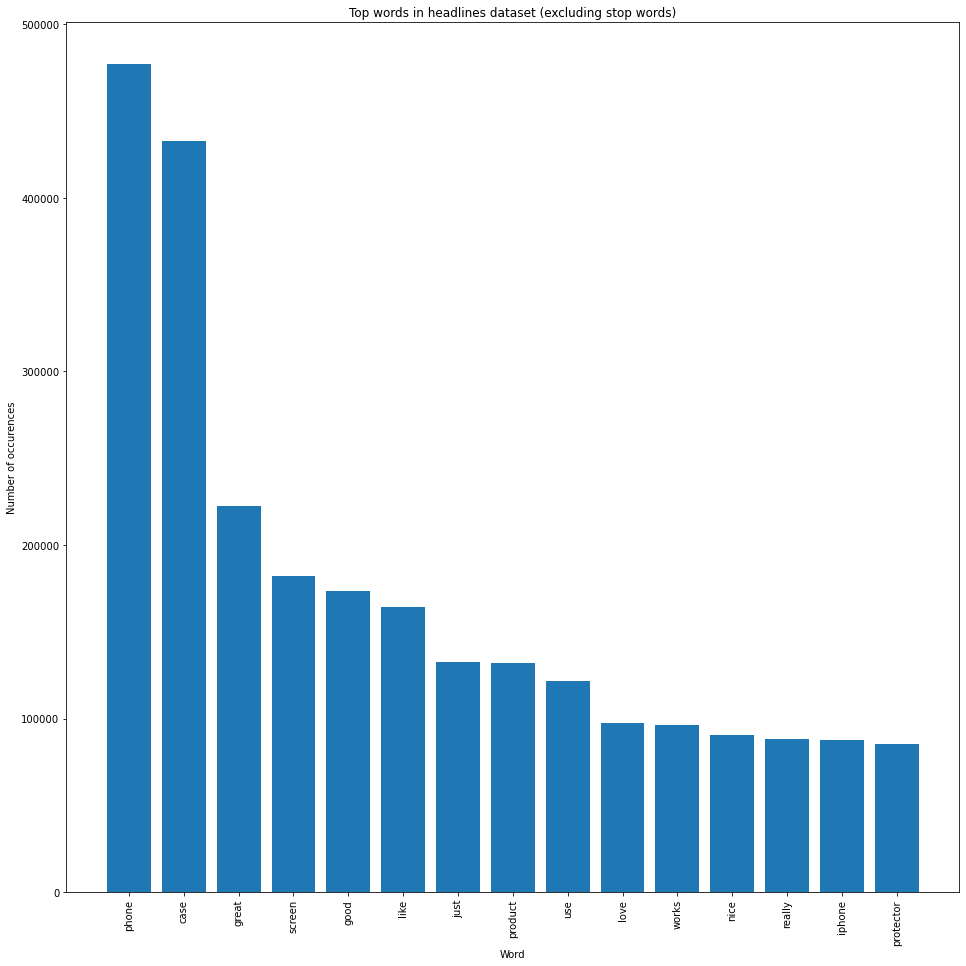

In [32]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,16))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()


In [33]:
x=df1.IC.unique()

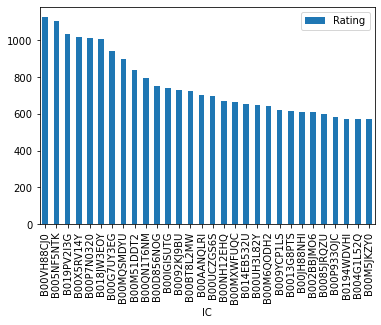

In [34]:
popular_products = pd.DataFrame(df.groupby('IC')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(20)
most_popular.head(30).plot(kind = "bar")

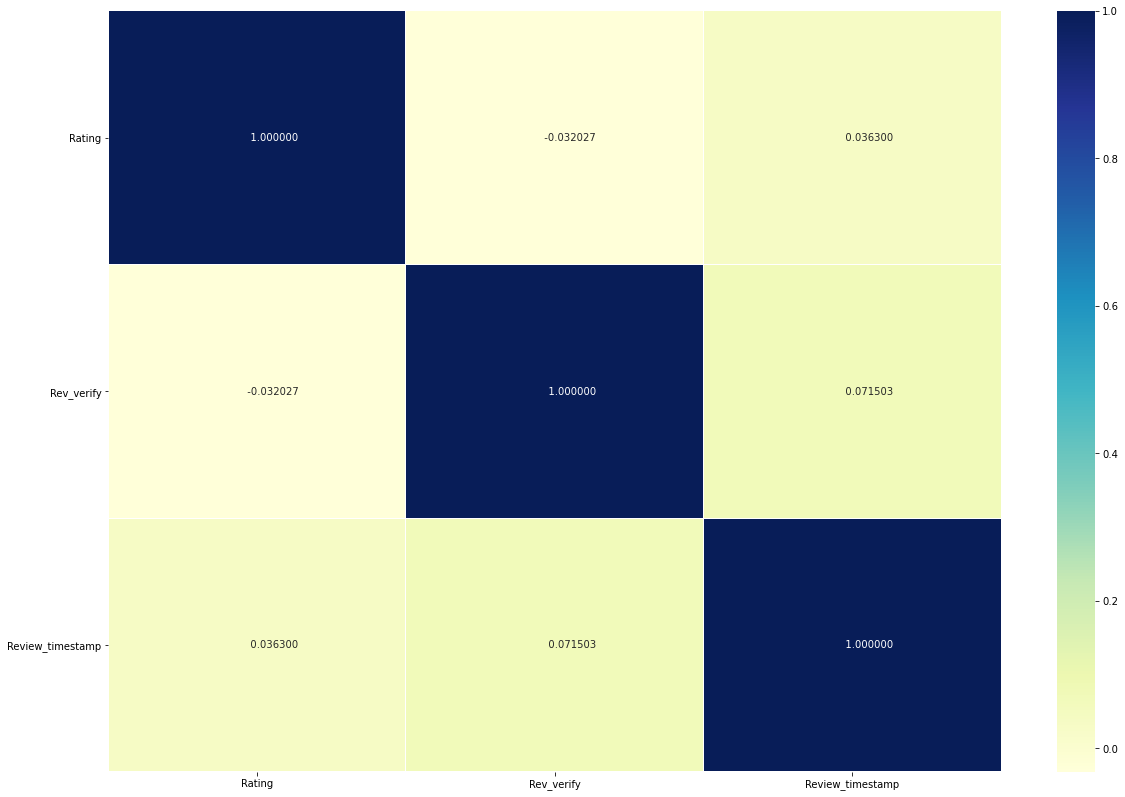

In [40]:
plt.figure(figsize=(20,14))
sns.heatmap(df1.corr(),linewidths=.1,fmt="19f",cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# **Creating Summary for differnet product by grouping itby IC **

In [35]:
df31 = df1.groupby(['IC'])['Rating'].mean().reset_index()
df32 = df1.groupby(['IC'])['Rating'].max().reset_index()
df33 = df1.groupby(['IC'])['Rating'].min().reset_index()
df3 = df1.groupby(['IC'])['cleanedtest'].sum().reset_index()


In [36]:
df3['Average_rating']=df31['Rating']
df3['Minimum Rating']=df33['Rating']
df3['Maximum_Rating']=df32['Rating']

In [43]:

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>


In [44]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [46]:
df4=df3[0:1]

In [47]:
from gensim import matutils, models
import scipy.sparse

In [52]:
summary=[]
for i in range(0,48134):
    try:
        df4=df3[i:i+1]
        data_nouns = pd.DataFrame(df4.cleanedtest.apply(nouns_adj))
        add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people','youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
        stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
        # Recreate a document-term matrix with only nouns
        cvn = CountVectorizer(stop_words=stop_words)
        data_cvn = cvn.fit_transform(data_nouns.cleanedtest)
        data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
        data_dtmn.index = data_nouns.index
        corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

        # Create the vocabulary dictionary
        id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())
        ldan = models.LdaModel(corpus=corpusn, num_topics=1, id2word=id2wordn, passes=10)
        summary.append(ldan.print_topics())

    except ValueError as ve:
        summary.append('None')
        pass

In [79]:
analyser = SentimentIntensityAnalyzer()
df3['neu']=df3['cleanedtest'].apply(lambda x: analyser.polarity_scores(x)['neu'])
df3['pos']=df3['cleanedtest'].apply(lambda x: analyser.polarity_scores(x)['pos'])
df3['compound']=df3['cleanedtest'].apply(lambda x: analyser.polarity_scores(x)['compound'])
df3['neg']=df3['cleanedtest'].apply(lambda x: analyser.polarity_scores(x)['neg'])

In [62]:
len(summary)

48134

In [63]:
len(df3)

48134

In [66]:
df3['Keywords']=summary

In [ ]:
df3=df3.drop(['cleanedtest'],axis=1)

In [ ]:
df3

In [ ]:
df3.to_csv('file1.csv')